# **Customer Segmentation Project with Mall Customers**

## **Table of Contents**

1. [Project Introduction](#id-section1)
2. [Data Exploration](#id-section2)
3. [Cluster Analysis Using KMeans](#id-section3)
4. [Implications](#id-section4)

<div id='id-section1'/>

## **1. Project Introduction**

The purpose of this project is to demonstrate how kmeans clustering can be used for customer segmentation. The data for this project comes from the mall-customers dataset, which includes gender, age, income, and spending score data for 200 customers.

In general, the goal of customer segmentation is to gain a better understanding of the customer base. Depending on the type of customer information available, the end product of customer segmentation varies.

The end goal of this project is to segment our customers into meaningful groups based on their annual income and spending score. In my view, it is important to understand that customer segmentation is not the product, but rather is one step in a process of finding out how to better meet the needs of customers. 

<div id='id-section2'/>

## **2. Data Exploration**

### **Load Libraries and Dataset**

First, we need to import a few libraries. These will assist us in importing and visualizing the data as well as in computing summary statistics. Upon entering the clsutering portion of the project, more libraries will be loaded.

In [49]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [50]:
# load data
file = 'Mall_Customers.csv'
df = pd.read_csv(file)

# view first 5 rows of data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Loading was successful, however, the annual income and spending score columns could be a little easier to read (and type out). Therefore, this concern will be addressed below by simplifying the names of these columns.

In [51]:
df.rename({'Annual Income (k$)' : 'Annual_Income', 'Spending Score (1-100)' : 'Spending_Score'}, axis = 1, inplace = True)

### **Data Summary**

We will begin with getting a feel for our data by producing summary statistics.

In [52]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Now we have a better idea of what the distribution of our data is. We now know there are 200 customers in the dataset, the mean age is 38.8, their mean income is $60,000 annually, and their mean spending score is 50.2.

While having the summary statistics in a tabulated format such as the one above is fine, it is much easier to view these distributions through the form of charts. We will use a combination of pie charts, violin plotss, and histograms to gain a better understanding of the data.

### **Distribution of Data**

In this section we will look at the distribution of the customers by gender, age, income, and spending score. 

Truth be told, there are many fancier grpahs than those I use here (overlayed histograms, heatmaps, etc.). However, my goal is to as directly and informatively as possible convey information about the make-up of our customers. Often, this kind of information will be presented to 'non-data' people in a company. Therefore, I decided that using the most direct and intuitive visualizions possible (in my opinion) would be best.

#### **Gender**

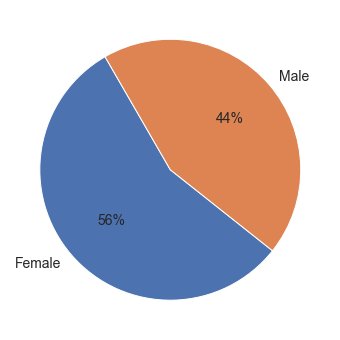

In [62]:
# Data to plot
labels = 'Female', 'Male'
sizes = [112, 88]

# Plot
plt.figure(figsize = (6, 6))
plt.pie(sizes, labels = labels, autopct = '%1.0f%%', startangle = 120, textprops = {'fontsize': 14})
plt.show()

The pie chart reveals that there are 6% more (or 12 percentage points more) females than male customers.

#### **Age**

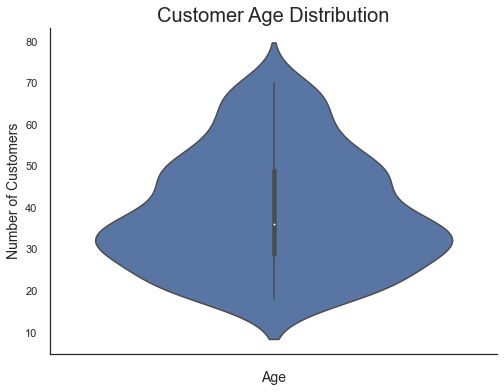

In [63]:
plt.figure(figsize = (8, 6))
sns.set_style('white')

sns.violinplot(data = df, y = 'Age')

plt.title('Customer Age Distribution', fontsize = 20)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)

sns.despine()

The violin plot is an intuitive way to look at the age distribution and reveals that most of our customers are between the ages of 30 and 40 years old.

#### **Income**

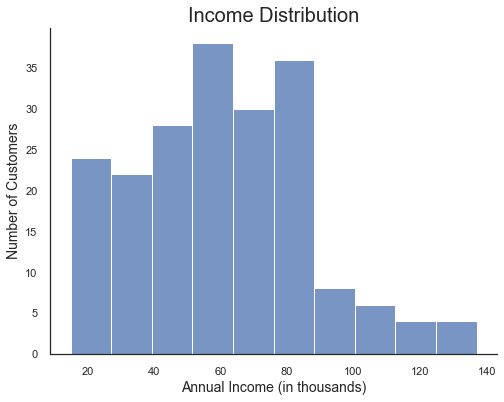

In [64]:
plt.figure(figsize = (8, 6))
sns.set_style('white')

sns.histplot(data = df, x = 'Annual_Income')

plt.title('Income Distribution', fontsize = 20)
plt.xlabel('Annual Income (in thousands)', fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)

sns.despine()

Here, we find that most customers make less than 90,000 dollar a year and many earn between 40,000 and 90,000 dollars annually. 

#### **Spending Score**

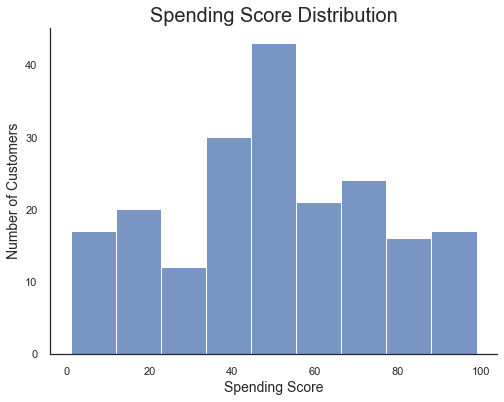

In [65]:
plt.figure(figsize = (8, 6))
sns.set_style('white')

sns.histplot(data = df, x = 'Spending_Score')

plt.title('Spending Score Distribution', fontsize = 20)
plt.xlabel('Spending Score', fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)

sns.despine()

Spending score is distributed somewhat normally, with most customers clustering around the mean of 50 and the rest tailing off in either direction.

<div id='id-section3'/>

## **3. Cluster Analysis Using KMeans**

This section goes through the steps taken to create segments of customers using the kmeans method. An incredible wealth of resources already exist with a quick google search of 'cluster analysis with kmeans', including [this one](https://www.kdnuggets.com/2019/05/guide-k-means-clustering-algorithm.html), therefore I offer only a brief summary here.

Essentially, after a pre-determined amount of clusters is chosen, several random points are chosen to be the center of each cluster (called centroids). The algorithm assigns the data points around this centroid to the cluster then evaluates the mean of the data points. This process is repeats through several iterations until the centroid no longer moves. Once it is finished, we have our clusters. 

### **Specify Data We Want to Use**

In [66]:
# specify data to be used
x = df.iloc[:, [3 ,4]].values

### **Determine Optimal Number of Clusters**

There are several ways to determine the amount of clusters you should use when clustering. Here, we will use the elbow method. Documentation on the specific package we use, yellowbrick, can be found [here](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html). 

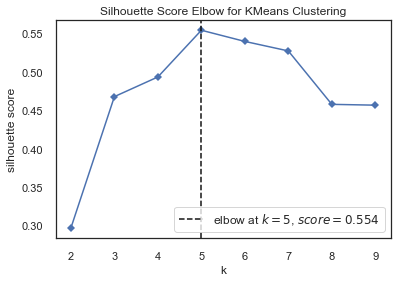

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [67]:
# import elbow method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# instantiate model
model = KMeans(random_state = 0)

# instantiate visualizer and with number of clusters and metric
visualizer = KElbowVisualizer(model, k = (2, 10), metric = 'silhouette', timings = False)

# fit and visualize
visualizer.fit(x)
visualizer.poof()

### **Training the model**

In [68]:
# training the model with kmeans clustering 
km = KMeans(n_clusters = 5, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(x)

### **Visualizing the model**

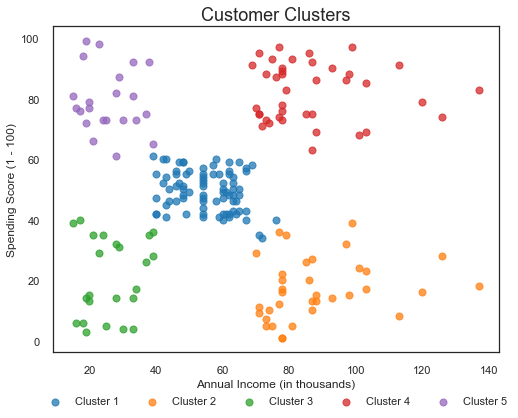

In [69]:
# plot
plt.figure(figsize = (8, 6))
sns.set(style = 'white')

plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s = 50, c = 'tab:blue', alpha = .75, label = 'Cluster 1')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s = 50, c = 'tab:orange', alpha = .75, label = 'Cluster 2')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s = 50, c = 'tab:green', alpha = .75, label = 'Cluster 3')
plt.scatter(x[y_km == 3, 0], x[y_km == 3, 1], s = 50, c = 'tab:red', alpha = .75, label = 'Cluster 4')
plt.scatter(x[y_km == 4, 0], x[y_km == 4, 1], s = 50, c = 'tab:purple', alpha = .75, label = 'Cluster 5')

plt.title('Customer Clusters', fontsize = 18)
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend(loc = 'center', bbox_to_anchor = (0.5, -0.15), ncol = 5)

plt.show()

The final product of our use of the kmeans clustering algorithm has shown use that our customers can be segmented into 5 groups when we take into account their income and spending scores.

**Cluster 1: *Mid-Spender / Mid-Earner***

**Cluster 2: *Low-Spender / High-Earner***

**Cluster 3: *Low-Spender / Low-Earner***

**Cluster 4: *High-Spender / High-Earner***

**Cluster 5: *High-Spender / Low-Earner***

Below, the plot has been reproduced including the more descriptive names of each customer segment.

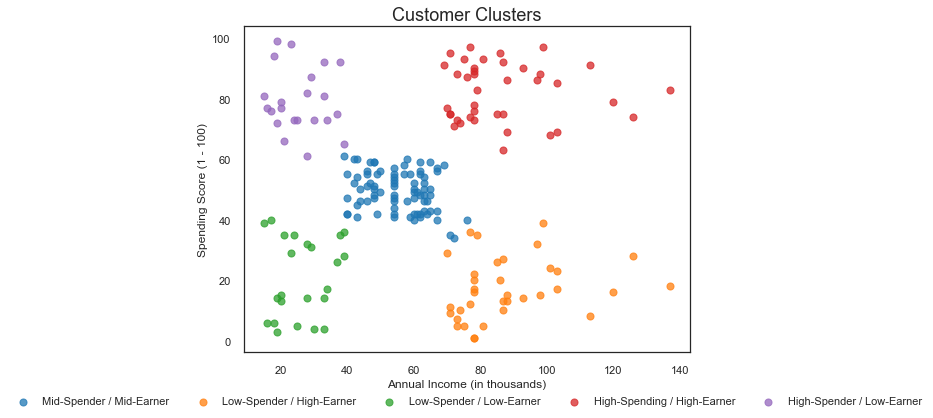

In [70]:
# plot
plt.figure(figsize = (8, 6))
sns.set(style = 'white')

plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s = 50, c = 'tab:blue', alpha = .75, label = 'Mid-Spender / Mid-Earner')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s = 50, c = 'tab:orange', alpha = .75, label = 'Low-Spender / High-Earner')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s = 50, c = 'tab:green', alpha = .75, label = 'Low-Spender / Low-Earner')
plt.scatter(x[y_km == 3, 0], x[y_km == 3, 1], s = 50, c = 'tab:red', alpha = .75, label = 'High-Spending / High-Earner')
plt.scatter(x[y_km == 4, 0], x[y_km == 4, 1], s = 50, c = 'tab:purple', alpha = .75, label = 'High-Spender / Low-Earner')

plt.title('Customer Clusters', fontsize = 18)
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend(loc = 'center', bbox_to_anchor = (0.5, -0.15), ncol = 5)

plt.show()

<div id='id-section4'/>

## **4. Implications**

At this point, we have identified 5 meaningful customer groups. However, performing cluster analysis in order to partition customers into groups is not the end goal. The end goal, is to turn this new information into actionable insights. 

**What We Know Now**

1. Who the most valuable customers are. *(those with the highest spending score - the purple and red clusters)*

2. There is a relatively large group that is hovering around the mean in terms of annual income and spending score. *(the blue cluster)*

3. There are two groups of customers that are currently not very profitable for our mall due to their low spening score. *(the green and orange clusters)*

**What Do We Do Next**

There are several general (and obvious) answers we could give here. For example, target lower spending score customers with discounts and promotions or continue to find ways to cater to the most valuable customers. There is nothing wrong with these answers necessarily, however, I would like to offer another suggestion below.

In reality, this customer segmentation model serves as a good springboard for conducting more in-depth, qualitative research on each segment. For instance, we might conduct qualitative interviews and surveys with randomly selected customers from the two high spending groups. The aim of this being to gather information about the kinds of products they buy and stores they frequently shop at in the mall. This would give us a clearer picture about how this segment as a whole thinks as well as where, when, and how much money they spend. The same could be done for the lower spending groups. Qualitative feedback from these two low value groups could help us better understand what we can do to increase their engagement and ultimately their spending money at the mall. This could be done for the mid income / mid-spending group as well. This could be a potentially high-value group because it is apparent that they are not opposed to spending their moeny, nor do they lack the financial resources to increase their spending. The key then, is to find out how to unlock and unleash their spending potential.

If you have taken the time to read through the entire project, then I want to take a moment to thank you here. Thanks!